<a href="https://colab.research.google.com/github/shibanisankpal/datascience-and-analytics/blob/main/Customer_Segmentation_on_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


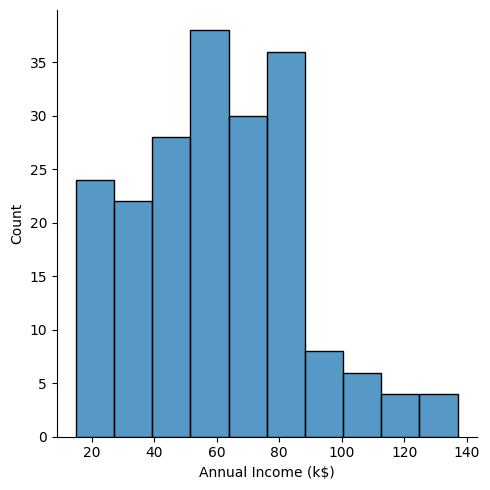

In [8]:
sns.displot(df['Annual Income (k$)'])

In [9]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<ipython-input-10-5ca076eb9808>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-10-5ca076eb9808>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-10-5ca076eb9808>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

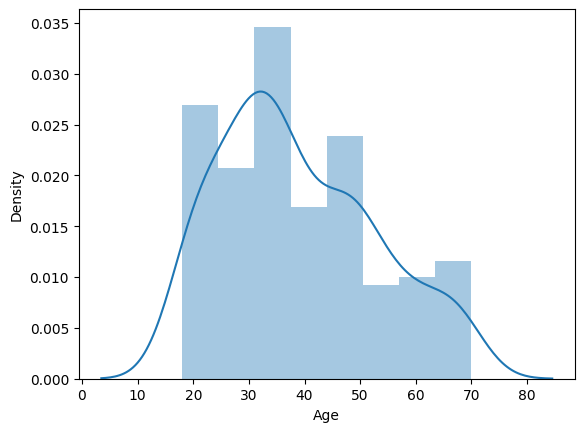

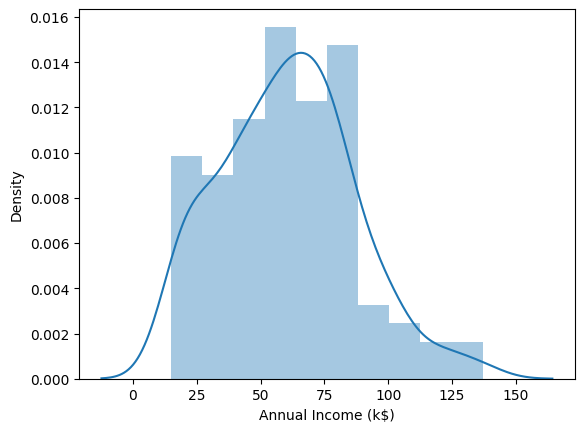

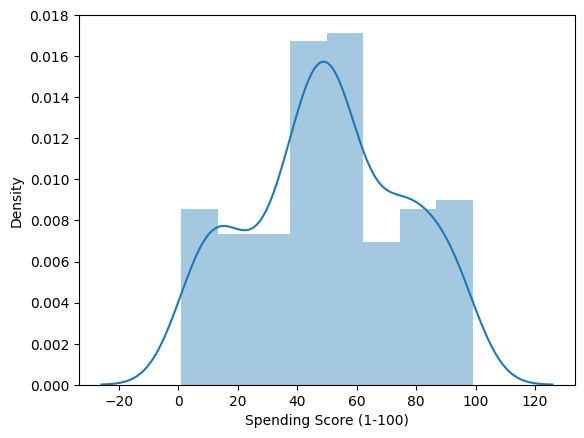

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

Clustering

In [21]:
# Separate the categorical and numerical features
categorical_features = ['Gender']  # Add the names of your categorical features
numerical_features = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Add the names of your numerical features

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

transformed_data = preprocessor.fit_transform(df)


In [23]:

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

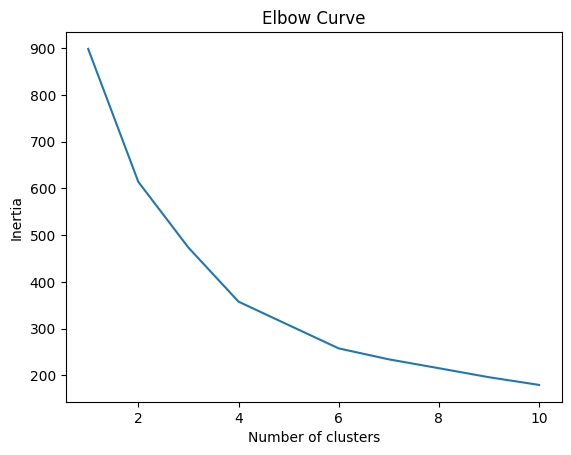

In [24]:
# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [27]:
# Based on the elbow curve, select the optimal number of clusters
n_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(transformed_data)

# Add the predicted clusters to your original DataFrame
df['Cluster'] = kmeans.labels_

# Explore the results
print(df['Cluster'].value_counts())

2    60
3    59
1    41
0    40
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        159.775000  40.275000           85.925000               19.750000
1        160.048780  32.731707           85.634146               80.902439
2         50.250000  26.183333           38.616667               57.616667
3         70.033898  55.016949           48.254237               41.966102


<ipython-input-28-bec18916e300>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


In [31]:
# Assuming you have two numerical features for visualization purposes
feature1 = 'Age'
feature2 = 'Annual Income (k$)'

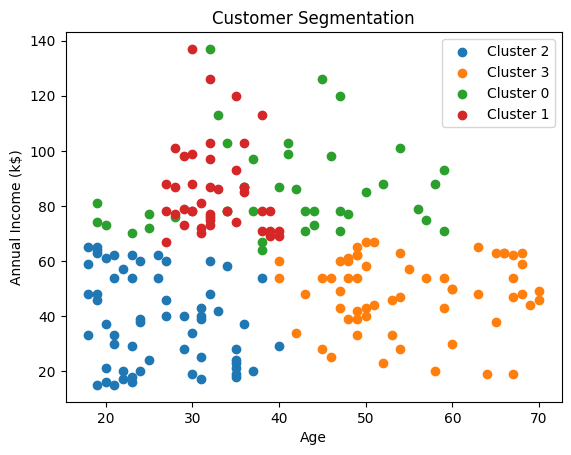

In [32]:
# Create a scatter plot for each cluster
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster_label}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Customer Segmentation')
plt.legend()
plt.show()